In [69]:
import numpy as np
import matplotlib.pyplot as plt

# PREGUNTA 1

In [81]:
def gauss_seidel(A,b,x0,tol = 1e-10):
    x = x0.copy()
    k = 0
    diff = np.inf  #solo es para entrar al while
    normas_v = []
    while  diff>tol and k<100:
        x_ant = x.copy()
        for i in range(len(A)):
            suma1 = 0
            suma2 = 0
            for j in range(0,i-1):
                suma1 += A[i,j]*x[j]
            for j in range(i,len(A)):
                suma2 += A[i,j]*x_ant[j]
            
            x[i] = (b[i]-suma1-suma2)/A[i,i]
        diff = np.linalg.norm(x - x_ant)
        normas_v.append(np.linalg.norm(x))
        k += 1
    return x,k,normas_v

In [82]:
def hilbert(n):
    H = np.eye(n)
    for i in range(n):
        for j in range(n):
            H[i,j]=1/((i+1)+(j+1)-1)
    return H

In [119]:
A = hilbert(100)
b = np.ones(100)
x0 = np.zeros(100)
x,k,normas_v = gauss_seidel(A,b,x0)
normas_v    #EVOLUCIÓN DE LAS NORMAS EN CADA ITERACIÓN

[np.float64(76.38947224867913),
 np.float64(3320.750265047803),
 np.float64(81185.09386384122),
 np.float64(1493656.5634886492),
 np.float64(20167335.646819074),
 np.float64(247007417.7398846),
 np.float64(2556663492.9724374),
 np.float64(27379380528.4151),
 np.float64(313668173898.83453),
 np.float64(3680951325688.1157),
 np.float64(47959312133972.16),
 np.float64(547547354884128.3),
 np.float64(6839006025160277.0),
 np.float64(7.517977460759014e+16),
 np.float64(9.100680703634515e+17),
 np.float64(1.0479728745983152e+19),
 np.float64(1.2414771954955464e+20),
 np.float64(1.510405630041213e+21),
 np.float64(1.715356432445774e+22),
 np.float64(2.1338447328499527e+23),
 np.float64(2.3628092985251047e+24),
 np.float64(2.9503058094840744e+25),
 np.float64(3.3120388959581536e+26),
 np.float64(4.050217471043487e+27),
 np.float64(4.716506545451776e+28),
 np.float64(5.529583483149555e+29),
 np.float64(6.702246579803926e+30),
 np.float64(7.556987214307649e+31),
 np.float64(9.424880245211739e+32

<function matplotlib.pyplot.show(close=None, block=None)>

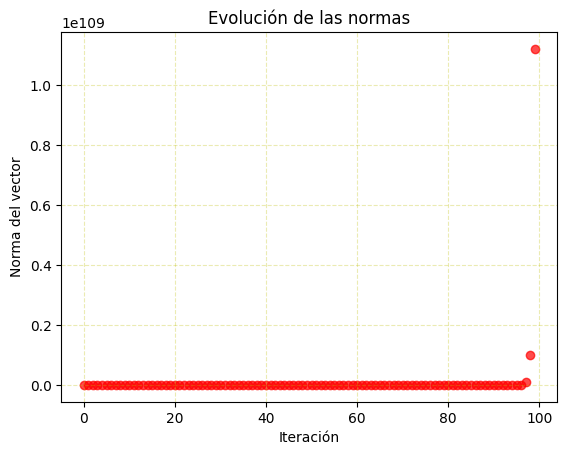

In [118]:
x = np.arange(k)
plt.scatter(x,normas_v,color='r', alpha=0.7)
plt.title('Evolución de las normas')
plt.xlabel('Iteración')
plt.ylabel('Norma del vector')
plt.grid(True, linestyle='--', alpha=0.3,color = 'y')
plt.show

Podemos visualizar que en cada iteración el valor de la norma aumenta exponencialmente. Además, sabemos que la matriz de hilbert es MAL condicionada. Podemos concluir que el método NO converge para este tipo de matriz, pues NO es definida positiva

In [121]:
# PRESENCIA DE VALORES PROPIOS NEGATIVOS
for v in np.linalg.eigvals(hilbert(100)):
    if v < 0:
        print(v)  

(-1.1717432024663086e-17+7.719279870761465e-19j)
(-1.1717432024663086e-17-7.719279870761465e-19j)
(-1.1093210508105178e-17+0j)
(-8.143204143123021e-18+9.760927267298773e-19j)
(-8.143204143123021e-18-9.760927267298773e-19j)
(-7.246628200513185e-18+1.7158766288013871e-18j)
(-7.246628200513185e-18-1.7158766288013871e-18j)
(-6.890663301324051e-18+0j)
(-6.290133123129001e-18+8.680432657354462e-19j)
(-6.290133123129001e-18-8.680432657354462e-19j)
(-5.795619311513776e-18+1.6307522011776694e-18j)
(-5.795619311513776e-18-1.6307522011776694e-18j)
(-5.3209938532789316e-18+9.525744414402825e-19j)
(-5.3209938532789316e-18-9.525744414402825e-19j)
(-4.162669727105934e-18+2.261102105159077e-18j)
(-4.162669727105934e-18-2.261102105159077e-18j)
(-4.172293697815637e-18+7.903656259261066e-19j)
(-4.172293697815637e-18-7.903656259261066e-19j)
(-4.300009578826986e-18+0j)
(-3.3989845332470325e-18+1.919444314555091e-18j)
(-3.3989845332470325e-18-1.919444314555091e-18j)
(-5.976043667964326e-19+3.035109238061548

# PREGUNTA 2
a)

In [ ]:
#Nos da el valor propio minimo (mas pequeño)
def potencia_inversa(A , z0 , mu , nmax = 500 , tol = 1e-8):
    n = np.max(A.shape)
    M = A-mu*np.eye(n,n)
    q = z0/np.linalg.norm(z0)
    err = []
    sigma = []
    res = tol + 1
    niter = 0
    while res >= tol and niter <= nmax:
        niter += 1
        z = np.linalg.solve(M, q)
        q = z / np.linalg.norm(z)
        z = A @ q
        lam = q @ z              #valor propio más pequeño
        q2 = np.linalg.solve(M.T, q)
        q2 = q2 / np.linalg.norm(q2)
        costheta = abs(q2 @ q)  

        if costheta > 5e-2:
            res = np.linalg.norm(z - lam * q) / costheta
            err.append(res)
            sigma.append(lam)
        else:
            print('Multiple eigenvalue')
            break
    x = q     #Vector propio asociado
    return sigma , x , err , niter

b)

In [132]:
def potencia(A,q, tope = 100):
    for k in range(tope):            
        z = A @ q   
        q = z / np.linalg.norm(z)  #Vector propio normalizado
        nu = q.T @ A @ q           #Valor propio
    return nu,q

In [133]:
N = [10, 30, 50, 70]
for n in N:
    A = hilbert(n)
    q = np.ones(n)
    sigma , x , err , niter = potencia_inversa(A,q,0)
    Cond = potencia(A,q)[0]/sigma  #lam_max/lam_min
    print(f'Tamaño Matriz: {n} \t Iteraciones: {niter} \t\t Aprox. num. condición: {Cond}')

Tamaño Matriz: 10 	 Iteraciones: 2 		 Aprox. num. condición: [2.21778648e+12 1.60246322e+13]
Tamaño Matriz: 30 	 Iteraciones: 1 		 Aprox. num. condición: [2.80001341e+17]
Tamaño Matriz: 50 	 Iteraciones: 1 		 Aprox. num. condición: [6.6406922e+16]
Tamaño Matriz: 70 	 Iteraciones: 1 		 Aprox. num. condición: [5.79473521e+17]


En este caso, el método de la potencia inversa converge rápidamente en cada iteración. Además, recordemos que por defecto hemos puesto que el método de la potencia realice 100 iteraciones. Podemos evidenciar que, a pesar de que la matriz es mal condicionada, ambos métodos convergen. Esto se debe a que solo se necesita que la matriz sea SIMETRICA (En Gauss-Seidel las matrices de Hilbert no funcionan por que no son definidas positivas y por tanto, el método no converge.) 